# Hyperparameter Tuning


In [1]:
# Importing the libraries
import joblib
import os
import pandas as pd

In [2]:
# Load and preprocess the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)
train_data.head()

,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,bg-3:45,bg-3:30,...,bg-0:45,bg-0:30,bg-0:15,bg-0:00,bg+1:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_0,0.439216,0.473156,0.307230,0.141031,0.041414,-0.058444,0.008501,0.442683,0.943462,1.177179,...,3.074934,3.008996,2.641773,2.275154,13.4,0,0,1,0,0
p01_1,0.472507,0.306632,0.140625,0.041014,-0.058660,0.008304,0.442520,0.943584,1.177228,1.511171,...,3.008223,2.642046,2.274907,2.041687,12.8,0,0,1,0,0
p01_2,0.306055,0.140108,0.040662,-0.059003,0.008056,0.442168,0.943311,1.177337,1.511180,1.878562,...,2.641311,2.275096,2.041447,1.874925,15.5,0,0,1,0,0
p01_3,0.139603,0.040194,-0.059302,0.007675,0.441711,0.942779,1.177013,1.511271,1.878527,1.978760,...,2.274400,2.041582,1.874690,1.841572,14.8,0,0,1,0,0
p01_4,0.039731,-0.059721,0.007340,0.441080,0.942082,1.176398,1.510874,1.878598,1.978712,1.978760,...,2.040910,1.874787,1.841338,1.708162,12.7,0,0,1,0,0


In [3]:
X = train_data.drop(columns=['bg+1:00'])
y = train_data['bg+1:00']

### Define a tuning function

In [4]:
def tune(tuner, X, y):
    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X=X, y=y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), f'{tuner.__name__}.model.pkl')

### Tune XGBoost

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 0.1),
             ('colsample_bytree', 0.85),
             ('gamma', 2.689246622779531),
             ('lambda', 0.1),
             ('learning_rate', 0.03727356690652492),
             ('max_depth', 5),
             ('min_child_weight', 5),
             ('n_estimators', 300),
             ('subsample', 0.7)])

RMSE: 1.957438960485212


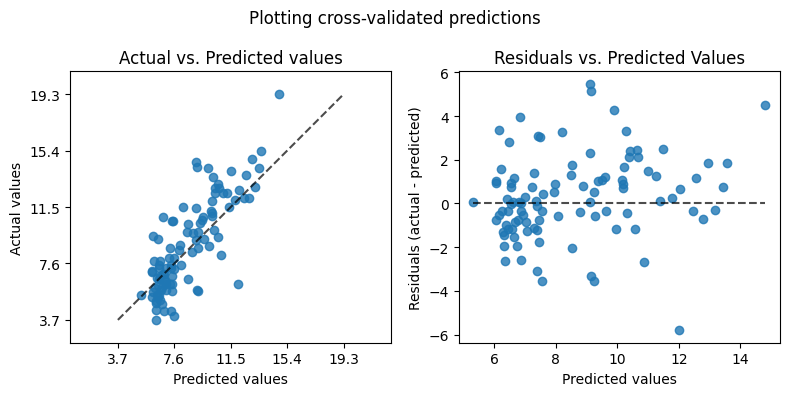

In [5]:
from src.features.tuners import XGBHyperparameterTuner

tune(XGBHyperparameterTuner(), X, y)

### Tune KNeighborsRegressor

-----------KNeighborsRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.


Best hyperparameters found.


OrderedDict([('leaf_size', 50),
             ('n_neighbors', 30),
             ('p', 2),
             ('weights', 'uniform')])

RMSE: 1.8274159699867234


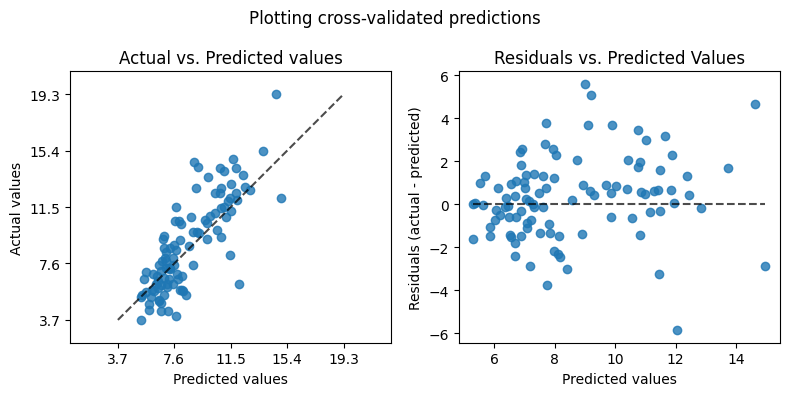

In [6]:
from src.features.tuners import KNeighborsHyperparameterTuner

tune(KNeighborsHyperparameterTuner(), X, y)

### Tune ExtraTreesRegressor

-----------ExtraTreeRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('max_depth', 8),
             ('max_features', 0.8776079859987437),
             ('min_samples_leaf', 10),
             ('min_samples_split', 2),
             ('splitter', 'best')])

RMSE: 2.038847026633384


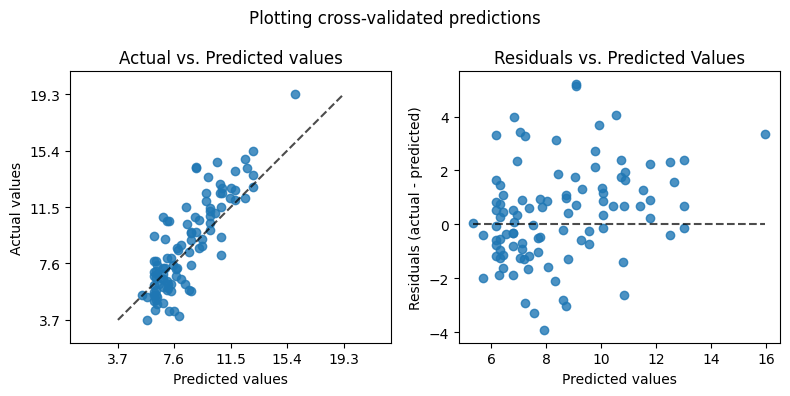

In [7]:
from src.features.tuners import ExtraTreesHyperparameterTuner

tune(ExtraTreesHyperparameterTuner(), X, y)

### Tune BaggingRegressor

-----------BaggingRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('max_features', 1.0),
             ('max_samples', 0.5),
             ('n_estimators', 100)])

RMSE: 1.0626396460583973


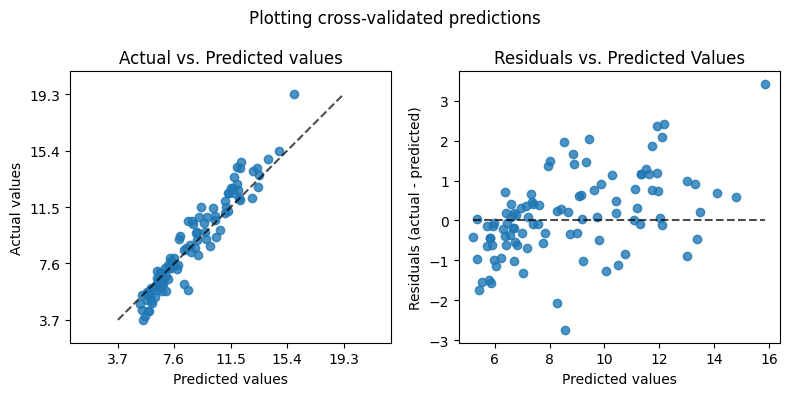

In [8]:
from src.features.tuners import BaggingHyperparameterTuner

tune(BaggingHyperparameterTuner(), X, y)